# **Importing the Libraries**

In [311]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [312]:
dt=pd.read_csv('bank-full.csv')

In [313]:
dt.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<AxesSubplot:>

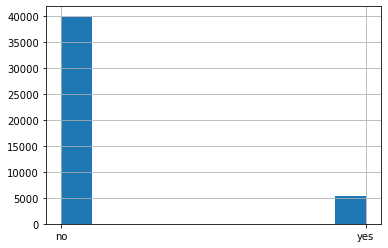

In [314]:
dt['Target'].hist()

# Checking the distribution of varaibles 

/var/folders/rb/9k_0pds92ssg15l_xnl_knsh0000gn/T/ipykernel_3493/3445926726.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dt.hist(ax = ax)


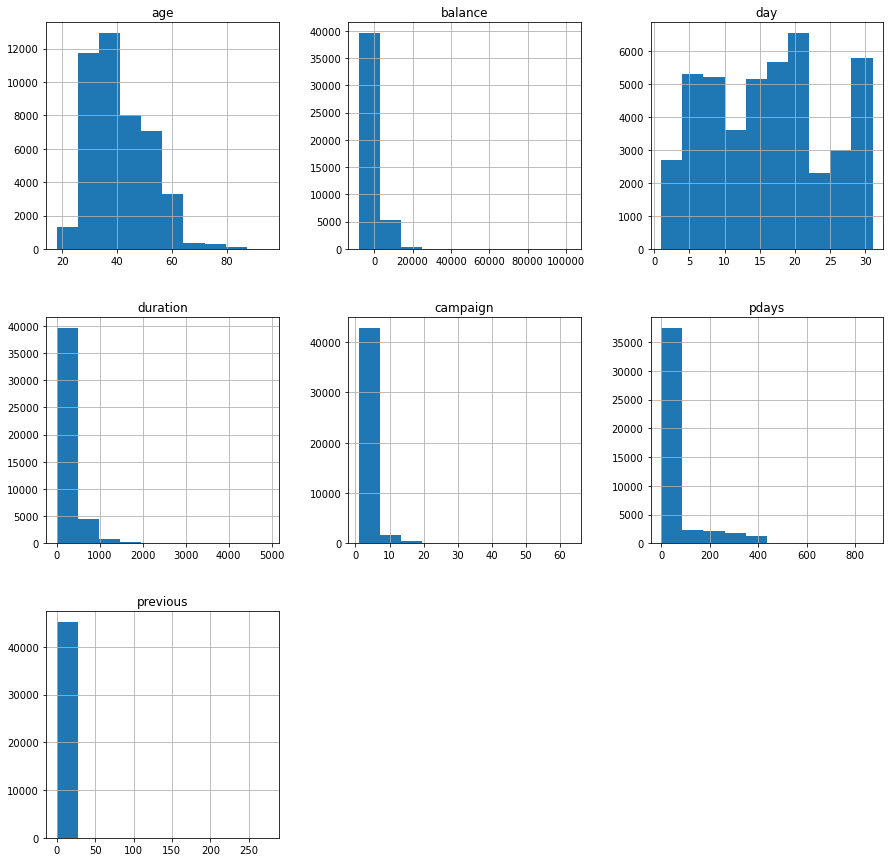

In [315]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
dt.hist(ax = ax)
plt.show()

# Correlation matrix of the variables

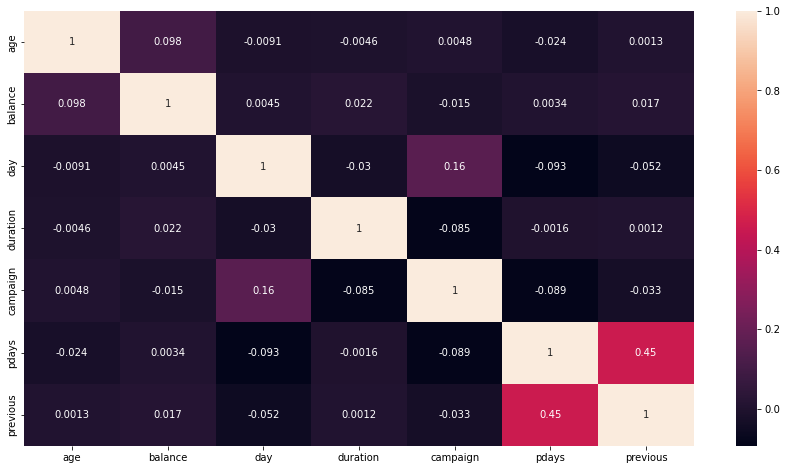

In [316]:
plt.figure(figsize=(15,8))
sns.heatmap(dt.corr(),annot=True)
plt.show()

# Mapping Yes to 1 and No to 0

In [317]:
dt['default'] = dt['default'].map({'yes': 1, 'no': 0})
dt['housing'] = dt['housing'].map({'yes': 1, 'no': 0})
dt['loan'] = dt['loan'].map({'yes': 1, 'no': 0})
dt['Target'] = dt['Target'].map({'yes': 1, 'no': 0})

# Creating dummy variables and simultaneously removing one variable to avoid dummy variable trap

In [318]:
dt.groupby('month').mean()['Target']

month
apr    0.196794
aug    0.110133
dec    0.467290
feb    0.166478
jan    0.101212
jul    0.090935
jun    0.102228
mar    0.519916
may    0.067195
nov    0.101511
oct    0.437669
sep    0.464594
Name: Target, dtype: float64

In [319]:
dt.groupby('day').mean()['Target']

day
1     0.279503
2     0.140758
3     0.164968
4     0.159170
5     0.112565
6     0.093685
7     0.086406
8     0.109121
9     0.114670
10    0.230916
11    0.122380
12    0.152215
13    0.152050
14    0.113636
15    0.139753
16    0.135689
17    0.090768
18    0.098787
19    0.069437
20    0.069767
21    0.099210
22    0.170166
23    0.134185
24    0.138702
25    0.158333
26    0.112077
27    0.133809
28    0.078142
29    0.073926
30    0.173052
31    0.071540
Name: Target, dtype: float64

In [320]:
dt.groupby('marital').mean()['Target']

marital
divorced    0.119455
married     0.101235
single      0.149492
Name: Target, dtype: float64

In [321]:
job = pd.get_dummies(dt['job'],prefix='job',drop_first=True)
dt = pd.concat([dt,job],axis=1)
print(dt)

edu = pd.get_dummies(dt['education'],prefix='education',drop_first=True)
dt = pd.concat([dt,edu],axis=1)

cont = pd.get_dummies(dt['contact'],prefix='contact',drop_first=True)
dt = pd.concat([dt,cont],axis=1)

pout = pd.get_dummies(dt['poutcome'],prefix='poutcome',drop_first=True)
dt = pd.concat([dt,pout],axis=1)

month = pd.get_dummies(dt['month'],prefix='month',drop_first=True)
dt = pd.concat([dt,month],axis=1)


       age           job   marital  education  default  balance  housing  \
0       58    management   married   tertiary        0     2143        1   
1       44    technician    single  secondary        0       29        1   
2       33  entrepreneur   married  secondary        0        2        1   
3       47   blue-collar   married    unknown        0     1506        1   
4       33       unknown    single    unknown        0        1        0   
...    ...           ...       ...        ...      ...      ...      ...   
45206   51    technician   married   tertiary        0      825        0   
45207   71       retired  divorced    primary        0     1729        0   
45208   72       retired   married  secondary        0     5715        0   
45209   57   blue-collar   married  secondary        0      668        0   
45210   37  entrepreneur   married  secondary        0     2971        0   

       loan    contact  day  ... job_entrepreneur  job_housemaid  \
0         0    unkn

In [322]:
dt.drop(['job','education','contact','poutcome','month', 'marital'], 1,inplace=True)
dt.head()

/var/folders/rb/9k_0pds92ssg15l_xnl_knsh0000gn/T/ipykernel_3493/2139995756.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dt.drop(['job','education','contact','poutcome','month', 'marital'], 1,inplace=True)


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [323]:
X = dt.drop(['Target'],1)
y = dt['Target']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(y_train)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print(y_pred)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix : \n",cm)
print("Accuracy :",acc)
print("Precision :",pre)
print("Recall :",recall)
print("F1-score :",f1)

/var/folders/rb/9k_0pds92ssg15l_xnl_knsh0000gn/T/ipykernel_3493/1045297948.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = dt.drop(['Target'],1)


13932    1
9894     0
39946    0
9217     0
4124     0
        ..
30403    0
21243    0
42613    1
43567    0
2732     0
Name: Target, Length: 36168, dtype: int64
[0 1 0 ... 0 0 0]
Confusion Matrix : 
 [[7752  228]
 [ 691  372]]
Accuracy : 0.8983744332632976
Precision : 0.62
Recall : 0.34995296331138287
F1-score : 0.44738424533974747


In [324]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  Target               45211 non-null  int64
 11  job_blue-collar      45211 non-null  uint8
 12  job_entrepreneur     45211 non-null  uint8
 13  job_housemaid        45211 non-null  uint8
 14  job_management       45211 non-null  uint8
 15  job_retired          45211 non-null  uint8
 16  job_self-employed    4

In [325]:
dt.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


# Detection of Outliers using BoxPlot

<AxesSubplot:xlabel='age'>

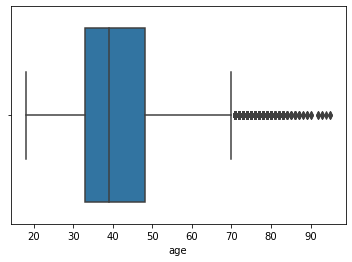

In [326]:
sns.boxplot(x=dt['age'])

<AxesSubplot:xlabel='balance'>

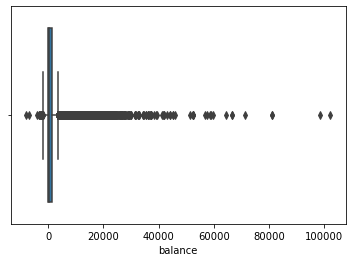

In [327]:
sns.boxplot(x=dt['balance'])

<AxesSubplot:xlabel='duration'>

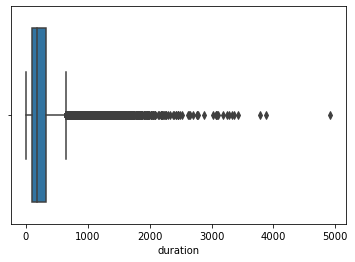

In [328]:
sns.boxplot(x=dt['duration'])

<AxesSubplot:xlabel='campaign'>

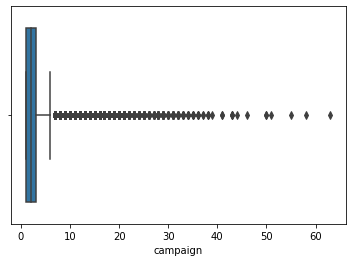

In [329]:
sns.boxplot(x=dt['campaign'])

<AxesSubplot:xlabel='pdays'>

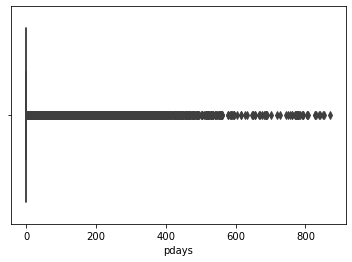

In [330]:
sns.boxplot(x=dt['pdays'])

<AxesSubplot:xlabel='previous'>

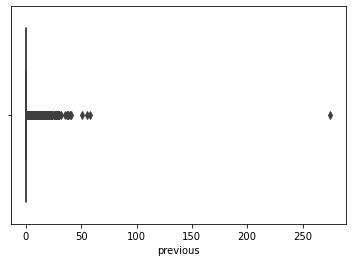

In [331]:
sns.boxplot(x=dt['previous'])

<AxesSubplot:xlabel='day'>

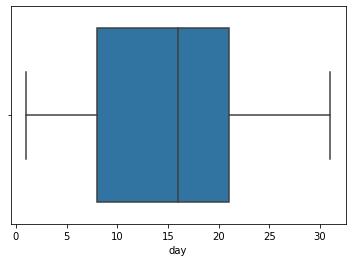

In [332]:
sns.boxplot(x=dt['day'])

# Z-score
*Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution. While calculating the Z-score we re-scale the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.*

In [333]:
from scipy import stats
z = np.abs(stats.zscore(dt[['age','balance','duration','campaign','pdays','previous', 'day']]))
print(z)

            age   balance  duration  campaign     pdays  previous       day
0      1.606965  0.256419  0.011016  0.569351  0.411453  0.251940  1.298476
1      0.288529  0.437895  0.416127  0.569351  0.411453  0.251940  1.298476
2      0.747384  0.446762  0.707361  0.569351  0.411453  0.251940  1.298476
3      0.571051  0.047205  0.645231  0.569351  0.411453  0.251940  1.298476
4      0.747384  0.447091  0.233620  0.569351  0.411453  0.251940  1.298476
...         ...       ...       ...       ...       ...       ...       ...
45206  0.947747  0.176460  2.791329  0.076230  0.411453  0.251940  0.143418
45207  2.831227  0.120447  0.768224  0.246560  0.411453  0.251940  0.143418
45208  2.925401  1.429593  3.373797  0.721811  1.436189  1.050473  0.143418
45209  1.512791  0.228024  0.970146  0.399020  0.411453  0.251940  0.143418
45210  0.370689  0.528364  0.399328  0.246560  1.476138  4.523577  0.143418

[45211 rows x 7 columns]


*Rows and Columns before removing the outliers*

In [334]:
dt.shape

(45211, 41)

In [335]:
df = dt[(z < 3).all(axis=1)]

*Rows and columns after removing the outliers*

In [336]:
df.shape

(40209, 41)

In [338]:
df.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
count,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,...,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000
mean,40.659728,0.018727,1083.466189,0.551195,0.164739,15.819792,235.794723,2.464324,25.184312,0.352632,...,0.004377,0.060310,0.032480,0.156980,0.121291,0.010246,0.295581,0.089880,0.014524,0.010744
std,10.086648,0.135561,1722.823814,0.497378,0.370950,8.363663,190.408412,1.951391,71.762763,1.056890,...,0.066016,0.238063,0.177274,0.363786,0.326470,0.100706,0.456309,0.286014,0.119639,0.103096
min,18.000000,0.000000,-6847.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,66.000000,0.000000,0.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,430.000000,1.000000,0.000000,16.000000,178.000000,2.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,0.000000,1345.000000,1.000000,0.000000,21.000000,306.000000,3.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,72.000000,1.000000,10483.000000,1.000000,1.000000,31.000000,1030.000000,12.000000,340.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [339]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

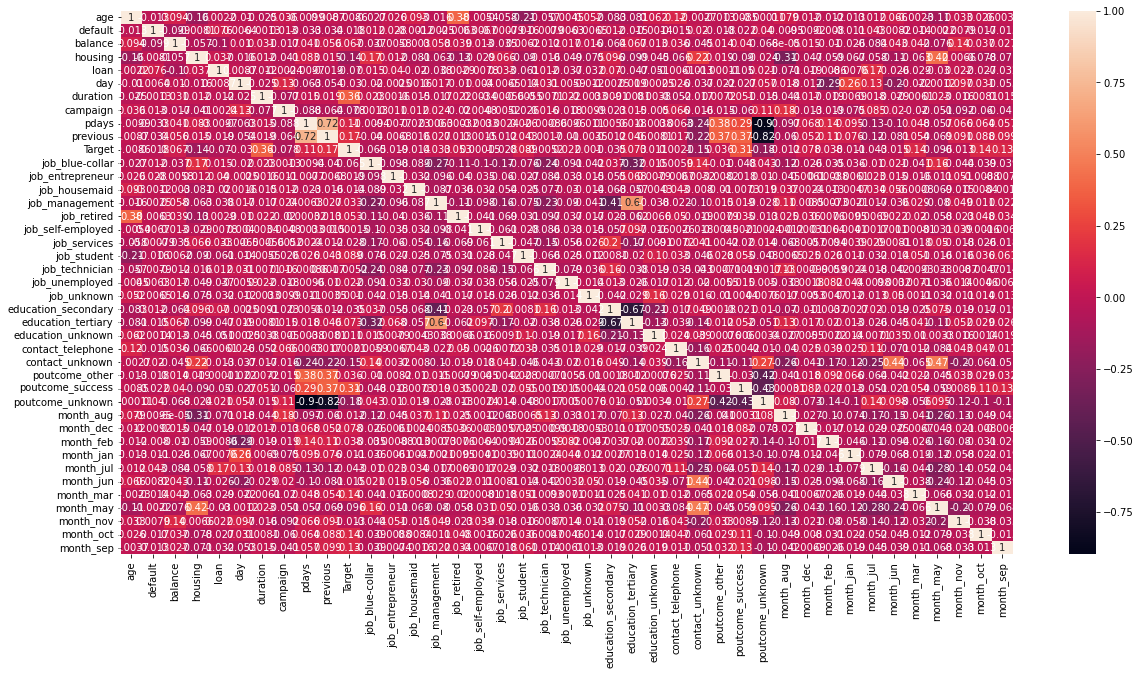

In [340]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [341]:
X = df.drop(['Target'],1)
y = df['Target']

/var/folders/rb/9k_0pds92ssg15l_xnl_knsh0000gn/T/ipykernel_3493/2544279944.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop(['Target'],1)


# Removal of irrelevant variables

*Here we will use logit function to check which variables are relevant. This is done by checking the p-value of the variables. The variables which has p-value greater then 0.05 will be removed*

In [342]:
import statsmodels.api as sm

res = sm.Logit(y,X).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.210623
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                40209
Model:                          Logit   Df Residuals:                    40169
Method:                           MLE   Df Model:                           39
Date:                Wed, 15 Dec 2021   Pseudo R-squ.:                  0.3557
Time:                        21:34:43   Log-Likelihood:                -8469.0
converged:                       True   LL-Null:                       -13144.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0189      0.002     -9.163      0.000      -0.023      -0.015
default                 0.1131      0.177      0.639      0.523      -0.234       0.460
balance              3.049e-05   1.12e-05      2.733      0.006    8.62e-06    5.24e-05
housing                -0.9081      0.048    -18.724      0.000      -1.003      -0.813
loan                   -0.5157      0.068     -7.577      0.000      -0.649      -0.382
day                    -0.0008      0.003     -0.284      0.776      -0.006       0.005
duration                0.0056   9.22e-05     61.032      0.000       0.005       0.006
campaign               -0.1243      0.014     -8.864      0.000      -0.152      -0.097
pdays                  -0.0065      0.000    -13.727      0.000      -0.007      -0.006
previous               -0.0149      0.024     -0.613      0.540      -0.063       0.033
job_blue-collar        -0.5508      0.078     -7.107      0.000      -0.703      -0.399
job_entrepreneur       -0.6103      0.140     -4.354      0.000      -0.885      -0.336
job_housemaid          -0.6263      0.149     -4.201      0.000      -0.919      -0.334
job_management         -0.3865      0.080     -4.840      0.000      -0.543      -0.230
job_retired             0.1832      0.112      1.639      0.101      -0.036       0.402
job_self-employed      -0.5665      0.125     -4.527      0.000      -0.812      -0.321
job_services           -0.4064      0.093     -4.391      0.000      -0.588      -0.225
job_student             0.0797      0.114      0.698      0.485      -0.144       0.303
job_technician         -0.3529      0.075     -4.720      0.000      -0.499      -0.206
job_unemployed         -0.4214      0.121     -3.478      0.001      -0.659      -0.184
job_unknown            -0.6816      0.268     -2.546      0.011      -1.206      -0.157
education_secondary    -0.0654      0.067     -0.978      0.328      -0.196       0.066
education_tertiary      0.2154      0.079      2.738      0.006       0.061       0.370
education_unknown       0.0813      0.116      0.703      0.482      -0.146       0.308
contact_telephone      -0.0393      0.089     -0.442      0.659      -0.214       0.135
contact_unknown        -1.7422      0.080    -21.687      0.000      -1.900      -1.585
poutcome_other         -0.0458      0.113     -0.403      0.687      -0.268       0.177
poutcome_success        2.0081      0.093     21.552      0.000       1.826       2.191
poutcome_unknown       -1.4743      0.104    -14.203      0.000      -1.678      -1.271
month_aug              -1.1308      0.085    -13.265      0.000      -1.298      -0.964
month_dec               0.5050      0.194      2.609      0.009       0.126       0.884
month_feb              -0.5028      0.094     -5.339      0.000      -0.687      -0.318
month_jan              -1.6054      0.135    -11.884      0.000      -1.870      -1.341
month_jul              -1.2413      0.084    -14.721      0.000      -1.4

In [343]:
X.drop(['poutcome_other','default', ],1,inplace=True)

/var/folders/rb/9k_0pds92ssg15l_xnl_knsh0000gn/T/ipykernel_3493/4106594628.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X.drop(['poutcome_other','default', ],1,inplace=True)


In [344]:
res = sm.Logit(y,X).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.210630
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                40209
Model:                          Logit   Df Residuals:                    40171
Method:                           MLE   Df Model:                           37
Date:                Wed, 15 Dec 2021   Pseudo R-squ.:                  0.3556
Time:                        21:34:48   Log-Likelihood:                -8469.2
converged:                       True   LL-Null:                       -13144.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0190      0.002     -9.233      0.000      -0.023      -0.015
balance                  3e-05   1.11e-05      2.697      0.007     8.2e-06    5.18e-05
housing                -0.9087      0.048    -18.739      0.000      -1.004      -0.814
loan                   -0.5132      0.068     -7.557      0.000      -0.646      -0.380
day                    -0.0008      0.003     -0.308      0.758      -0.006       0.004
duration                0.0056   9.21e-05     61.064      0.000       0.005       0.006
campaign               -0.1244      0.014     -8.877      0.000      -0.152      -0.097
pdays                  -0.0065      0.000    -13.740      0.000      -0.007      -0.006
previous               -0.0159      0.024     -0.658      0.511      -0.063       0.032
job_blue-collar        -0.5515      0.077     -7.128      0.000      -0.703      -0.400
job_entrepreneur       -0.6070      0.140     -4.336      0.000      -0.881      -0.333
job_housemaid          -0.6272      0.149     -4.208      0.000      -0.919      -0.335
job_management         -0.3865      0.080     -4.845      0.000      -0.543      -0.230
job_retired             0.1841      0.112      1.647      0.100      -0.035       0.403
job_self-employed      -0.5660      0.125     -4.524      0.000      -0.811      -0.321
job_services           -0.4075      0.093     -4.405      0.000      -0.589      -0.226
job_student             0.0769      0.114      0.675      0.499      -0.146       0.300
job_technician         -0.3532      0.075     -4.727      0.000      -0.500      -0.207
job_unemployed         -0.4218      0.121     -3.482      0.000      -0.659      -0.184
job_unknown            -0.6810      0.268     -2.544      0.011      -1.206      -0.156
education_secondary    -0.0672      0.067     -1.008      0.313      -0.198       0.063
education_tertiary      0.2130      0.079      2.713      0.007       0.059       0.367
education_unknown       0.0803      0.116      0.694      0.488      -0.146       0.307
contact_telephone      -0.0408      0.089     -0.459      0.646      -0.215       0.133
contact_unknown        -1.7406      0.080    -21.680      0.000      -1.898      -1.583
poutcome_success        2.0198      0.088     22.909      0.000       1.847       2.193
poutcome_unknown       -1.4643      0.101    -14.446      0.000      -1.663      -1.266
month_aug              -1.1314      0.085    -13.286      0.000      -1.298      -0.964
month_dec               0.5039      0.194      2.603      0.009       0.125       0.883
month_feb              -0.5054      0.094     -5.384      0.000      -0.689      -0.321
month_jan              -1.6077      0.135    -11.910      0.000      -1.872      -1.343
month_jul              -1.2403      0.084    -14.733      0.000      -1.405      -1.075
month_jun               0.1427      0.099      1.445      0.149      -0.051       0.336
month_mar               1.4415      0.129     11.179      0.000       1.1

In [345]:
X.drop(['education_unknown','contact_telephone'],1,inplace=True)

/var/folders/rb/9k_0pds92ssg15l_xnl_knsh0000gn/T/ipykernel_3493/3025678235.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X.drop(['education_unknown','contact_telephone'],1,inplace=True)


In [346]:
res = sm.Logit(y,X).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.210639
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                40209
Model:                          Logit   Df Residuals:                    40173
Method:                           MLE   Df Model:                           35
Date:                Wed, 15 Dec 2021   Pseudo R-squ.:                  0.3556
Time:                        21:34:50   Log-Likelihood:                -8469.6
converged:                       True   LL-Null:                       -13144.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0190      0.002     -9.321      0.000      -0.023      -0.015
balance              3.004e-05   1.11e-05      2.701      0.007    8.24e-06    5.18e-05
housing                -0.9079      0.048    -18.730      0.000      -1.003      -0.813
loan                   -0.5137      0.068     -7.564      0.000      -0.647      -0.381
day                    -0.0007      0.003     -0.257      0.797      -0.006       0.005
duration                0.0056    9.2e-05     61.168      0.000       0.005       0.006
campaign               -0.1250      0.014     -8.938      0.000      -0.152      -0.098
pdays                  -0.0065      0.000    -13.747      0.000      -0.007      -0.006
previous               -0.0152      0.024     -0.626      0.531      -0.063       0.032
job_blue-collar        -0.5558      0.077     -7.203      0.000      -0.707      -0.405
job_entrepreneur       -0.6059      0.140     -4.328      0.000      -0.880      -0.331
job_housemaid          -0.6365      0.149     -4.281      0.000      -0.928      -0.345
job_management         -0.3832      0.080     -4.810      0.000      -0.539      -0.227
job_retired             0.1772      0.111      1.590      0.112      -0.041       0.396
job_self-employed      -0.5640      0.125     -4.509      0.000      -0.809      -0.319
job_services           -0.4060      0.092     -4.389      0.000      -0.587      -0.225
job_student             0.0879      0.112      0.784      0.433      -0.132       0.308
job_technician         -0.3506      0.075     -4.696      0.000      -0.497      -0.204
job_unemployed         -0.4236      0.121     -3.498      0.000      -0.661      -0.186
job_unknown            -0.6629      0.266     -2.495      0.013      -1.184      -0.142
education_secondary    -0.0872      0.059     -1.470      0.142      -0.203       0.029
education_tertiary      0.1917      0.071      2.697      0.007       0.052       0.331
contact_unknown        -1.7380      0.080    -21.707      0.000      -1.895      -1.581
poutcome_success        2.0237      0.088     22.983      0.000       1.851       2.196
poutcome_unknown       -1.4541      0.100    -14.490      0.000      -1.651      -1.257
month_aug              -1.1265      0.085    -13.260      0.000      -1.293      -0.960
month_dec               0.5061      0.193      2.618      0.009       0.127       0.885
month_feb              -0.5010      0.094     -5.352      0.000      -0.685      -0.318
month_jan              -1.6058      0.135    -11.900      0.000      -1.870      -1.341
month_jul              -1.2384      0.084    -14.730      0.000      -1.403      -1.074
month_jun               0.1469      0.099      1.491      0.136      -0.046       0.340
month_mar               1.4460      0.129     11.225      0.000       1.194       1.699
month_may              -0.5551      0.078     -7.109      0.000      -0.708      -0.402
month_nov              -1.2053      0.090    -13.369      0.000      -1.3

In [347]:
X.drop(['previous','job_retired', 'month_jun', 'education_secondary'],1,inplace=True)

/var/folders/rb/9k_0pds92ssg15l_xnl_knsh0000gn/T/ipykernel_3493/3441489550.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X.drop(['previous','job_retired', 'month_jun', 'education_secondary'],1,inplace=True)


In [348]:
res = sm.Logit(y,X).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.210734
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                40209
Model:                          Logit   Df Residuals:                    40177
Method:                           MLE   Df Model:                           31
Date:                Wed, 15 Dec 2021   Pseudo R-squ.:                  0.3553
Time:                        21:34:52   Log-Likelihood:                -8473.4
converged:                       True   LL-Null:                       -13144.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
age                   -0.0174      0.002    -10.342      0.000      -0.021      -0.014
balance             3.046e-05   1.11e-05      2.744      0.006     8.7e-06    5.22e-05
housing               -0.9307      0.048    -19.532      0.000      -1.024      -0.837
loan                  -0.5211      0.068     -7.688      0.000      -0.654      -0.388
day                   -0.0020      0.003     -0.743      0.458      -0.007       0.003
duration               0.0056   9.19e-05     61.213      0.000       0.005       0.006
campaign              -0.1252      0.014     -9.010      0.000      -0.152      -0.098
pdays                 -0.0067      0.000    -14.690      0.000      -0.008      -0.006
job_blue-collar       -0.5875      0.070     -8.425      0.000      -0.724      -0.451
job_entrepreneur      -0.6551      0.136     -4.827      0.000      -0.921      -0.389
job_housemaid         -0.6678      0.142     -4.701      0.000      -0.946      -0.389
job_management        -0.4333      0.072     -6.012      0.000      -0.574      -0.292
job_self-employed     -0.6123      0.121     -5.076      0.000      -0.849      -0.376
job_services          -0.4590      0.087     -5.268      0.000      -0.630      -0.288
job_student            0.0603      0.108      0.557      0.578      -0.152       0.273
job_technician        -0.4079      0.067     -6.056      0.000      -0.540      -0.276
job_unemployed        -0.4692      0.116     -4.037      0.000      -0.697      -0.241
job_unknown           -0.6961      0.262     -2.655      0.008      -1.210      -0.182
education_tertiary     0.2642      0.055      4.773      0.000       0.156       0.373
contact_unknown       -1.6851      0.071    -23.774      0.000      -1.824      -1.546
poutcome_success       2.0125      0.087     23.260      0.000       1.843       2.182
poutcome_unknown      -1.4484      0.085    -17.105      0.000      -1.614      -1.282
month_aug             -1.1942      0.075    -15.881      0.000      -1.342      -1.047
month_dec              0.4537      0.190      2.392      0.017       0.082       0.825
month_feb             -0.5759      0.084     -6.846      0.000      -0.741      -0.411
month_jan             -1.6530      0.132    -12.541      0.000      -1.911      -1.395
month_jul             -1.2963      0.077    -16.915      0.000      -1.446      -1.146
month_mar              1.3781      0.123     11.199      0.000       1.137       1.619
month_may             -0.6269      0.065     -9.665      0.000      -0.754      -0.500
month_nov             -1.2675      0.084    -15.151      0.000      -1.431      -1.103
month_oct              0.7145      0.115      6.229      0.000       0.490       0.939
month_sep              0.5428      0.130      4.170      0.000       0.288       0.798
======================================================================================
"""

In [349]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [350]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Here we will use LogisticRegression to see how well our model works

In [351]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [352]:
y_pred = lr.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [353]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix : \n",cm)
print("Accuracy :",acc)
print("Precision :",pre)
print("Recall :",recall)
print("F1-score :",f1)

Confusion Matrix : 
 [[7073  177]
 [ 517  275]]
Accuracy : 0.913703058940562
Precision : 0.6084070796460177
Recall : 0.3472222222222222
F1-score : 0.4421221864951768
